Load all the libraries

In [1]:
import requests
import json
import pandas as pd
import iso8601
import matplotlib.pyplot as plt

Data source: https://documenter.getpostman.com/view/10808728/SzS8rjbc?version=latest

In [2]:
#get method to extact the data

In [3]:
url = 'https://api.covid19api.com/all'
x = requests.get(url)

In [4]:
py_data = x.json()

In [5]:
py_data

[{'Country': 'Afghanistan',
  'CountryCode': 'AF',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '33.94',
  'Lon': '67.71',
  'Confirmed': 0,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 0,
  'Date': '2020-01-22T00:00:00Z'},
 {'Country': 'Afghanistan',
  'CountryCode': 'AF',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '33.94',
  'Lon': '67.71',
  'Confirmed': 0,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 0,
  'Date': '2020-01-23T00:00:00Z'},
 {'Country': 'Afghanistan',
  'CountryCode': 'AF',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '33.94',
  'Lon': '67.71',
  'Confirmed': 0,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 0,
  'Date': '2020-01-24T00:00:00Z'},
 {'Country': 'Afghanistan',
  'CountryCode': 'AF',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '33.94',
  'Lon': '67.71',
  'Confirmed': 0,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 0,
  'Date': '2020-01-25T00:00:00Z'},
 {'Country': 'Afghanistan',
  'CountryCode': 'AF

# Converting Json to DataFrame

In [6]:
new_file = pd.DataFrame.from_dict(py_data)

Changing the Date column from iso8601 to datetime type

In [7]:
new_file['Date'] =pd.to_datetime(new_file['Date'])

In [8]:
new_file.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00
1,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00
2,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00
3,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00
4,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00


In [9]:
print('No. of rows in the DataFrame :',new_file.shape)

No. of rows in the DataFrame : (407856, 12)


In [10]:
#checking the datatypes

In [11]:
new_file.dtypes

Country                     object
CountryCode                 object
Province                    object
City                        object
CityCode                    object
Lat                         object
Lon                         object
Confirmed                    int64
Deaths                       int64
Recovered                    int64
Active                       int64
Date           datetime64[ns, UTC]
dtype: object

In [12]:
#check for missing values

In [13]:
new_file.isnull().sum()

Country        0
CountryCode    0
Province       0
City           0
CityCode       0
Lat            0
Lon            0
Confirmed      0
Deaths         0
Recovered      0
Active         0
Date           0
dtype: int64

In [39]:
new_data = new_file[(new_file['Province']== "")]

In [40]:
import numpy as np
col_data = new_data['Deaths'].values
conf_data = new_data['Confirmed'].values
rec_data = new_data['Recovered'].values
act_data = new_data['Active'].values
diff_death = np.diff(col_data)
diff_death = np.insert(diff_death, 0, 0)
diff_conf= np.diff(conf_data)
diff_conf = np.insert(diff_conf, 0, 0)
diff_rec= np.diff(rec_data)
diff_rec = np.insert(diff_rec, 0, 0)
diff_act = np.diff(act_data)
diff_act = np.insert(diff_act, 0, 0)
new_data['diff_death'] = diff_death
new_data['diff_conf'] = diff_conf
new_data['diff_rec'] = diff_rec
new_data['diff_act'] = diff_act

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

# Connect to Oracle SQL

In [41]:
#library 
import cx_Oracle  

In [42]:
dsn_tns = cx_Oracle.makedsn(host='host',port='port',service_name='service_name')
conn = cx_Oracle.connect(user='user',password='password',dsn=dsn_tns)
cur=conn.cursor()

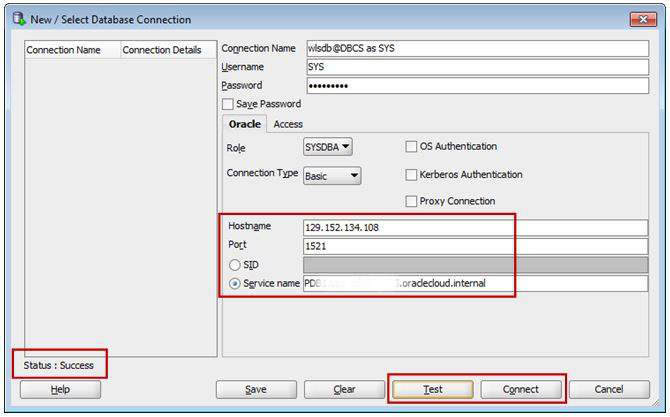

In [43]:
from IPython.display import Image
Image("Setup_oracle.png", width=800, height=800)


## Creating a new table in SQL

In [44]:
def create_table():
    sql_qul = """
    CREATE TABLE system.world_coronavirus (
    Country  varchar2(1000),
    CountryCode  varchar2(1000),
    Province  varchar2(1000),
    City  varchar2(1000),
    CityCode  varchar2(1000),
    Lat  varchar2(1000),
    Lon  varchar2(1000),
    Confirmed  varchar2(1000),
    Deaths  varchar2(1000),
    Recovered  varchar2(1000),
    Active  varchar2(1000),
    Date_id  Timestamp,
    daily_death  varchar2(100),
    daily_conf  varchar2(100),
    daily_rec  varchar2(100),
    daily_act varchar2(100)

    )
    """
    try:
        cur.execute(sql_qul)
    except cx_Oracle.DatabaseError as err:
        error = err.args[0]
        if error.code ==942:
            print('Oracle error message',error.message)
            print('As Drop statement continuing')
        else:
            raise err
create_table()

# Import the data into Oracle SQL

In [45]:
def dynamic_data_entry():
    sql = 'insert into system.world_coronavirus values(:Country,:CountryCode,:Province,:City,:CityCode,:Lat,:Lon,:Confirmed,:Deaths,:Recovered,:Active,:Date_id,: daily_death,: daily_conf,:daily_rec,:daily_act)'

    df_list = new_data.values.tolist()
    n =0
    for i in new_data.iterrows():
        cur.execute(sql,df_list[n])
        n +=1
dynamic_data_entry()
conn.commit()
conn.close()